# Task 5

## Build a Decision tree model for the given dataset. Attempt to interpret the variable importance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import plot_importance
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
# Seprate target variable from other features
# Create dummy of other features

x = pd.get_dummies(df.drop(["id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1))
y = df["trip_duration"]

### Split data into Train and test For Decision Tree Regressor

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=56)

## Fit data into Decision Tree Regressor

In [5]:
regressor = DecisionTreeRegressor()
regressor.fit(x, y)

DecisionTreeRegressor()

In [8]:
# Predict train 

predict_train = regressor.predict(x_train)
k = sqrt(mse(predict_train,y_train))
print("RMSE value of training ",k)

RMSE value of training  5.141649463598704


In [9]:
# Predict test

predict_test = regressor.predict(x_test)
k = sqrt(mse(predict_test,y_test))
print("RMSE value of testing ",k)

RMSE value of testing  5.831656072482232


### Fit data for XGBRegressor to know the Importance of different variables 

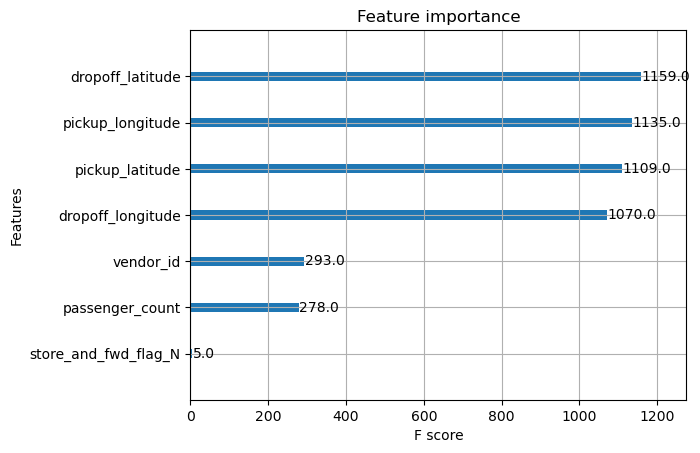

In [10]:
regressor_1 = XGBRegressor()
regressor_1.fit(x,y)
plot_importance(regressor_1)
plt.show()

We can see that value of dropoff_latitude is higher than other variables so we can say that impact of dropoff_latitude in trip duration is more compaire to other variables like pickup_longitude,pickup_latitude etc

In [11]:
# For decision tree model compute train score

decision_train_score = regressor.score(x_train,y_train)
decision_train_score*100

99.99984196840444

In [12]:
# For decision tree model compute test score

decision_test_score = regressor.score(x_test,y_test)
decision_test_score*100

99.99964408872123

In [13]:
# For plotting the bar graph, we store the score of the train

%store decision_train_score

Stored 'decision_train_score' (float64)


In [14]:
# For plotting the bar graph, we store the score of the test

%store decision_test_score

Stored 'decision_test_score' (float64)


## Conclusions
    1.It is best suited for training and testing since the RMSEs are nearly equal 
    2.Dropoff_latitude have a greater impact on trip duration with respect to pickup_longitude and pickup_latitude 
    3.Based on the train score and test score, we can conclude that the decision tree is the best model for predicting trip duration.